Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt
from IPython.display import Image

In [3]:
%matplotlib inline

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

Bibliographie:

Voir Landau & Lifshitz "Mécanique"

# Cône: roulement (sans frottement)

### Calcul des moments

On considère un cône de hauteur $h$ et de rayon de base $a$. Il convient de placer l'origine de coordonnées au sommet du cône, avec $z$ l'axe de symétrie, et donc d'utiliser les coordonnées cylindriques $(r, \phi, z)$:
$$x = r \cos \phi,\; y = r \sin \phi,\; z = z$$
Ici, $\phi \in (0, 2\pi)$, $z \in (0,h)$ et le rayon est $r=0$ pour $z=0$ et $r=a$ pour $z=h$:
$$r = \frac{a}{h} z$$
($z>0$).

On calcule d'abord le volume du cône:
$$\int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi = \frac{\pi a^2 h}{3}$$
et sa densité $\rho$ en fonction de sa masse $M$:
$$\rho = \frac{3M}{\pi a^2 h}$$

On calcule ensuite la position (sur l'axe $z$) du centre de masse:
$$R = \int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi \, z = \frac{3 h}{4}$$

Le tenseur d'inertie est diagonal $I_1, I_2, I_3$; on le calcule d'abord par rapport au centre $O$,
\begin{align*}
I_1 &= \int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi \, (r^2 \cos^2\phi + z^2) \\
I_2 &= \int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi \, (r^2 \sin^2\phi + z^2) \\
I_3 &= \int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi \, r^2
\end{align*}
et ensuite on tient compte de la translation au centre de masse $R$, $I_x, I_y, I_z$
$$I_x = I_1 - M R^2 ,\;
I_y = I_2 - M R^2 ,\;
I_z = I_3$$

## Moments d'inertie

On choisit le repère associé au cône est $(x,y,z)$ tel que $z$ est l'axe de symétrie, et la base est parallèle au plan $xy$:
$$I_x = I_y = \frac{3M}{20} \bigg(a^2 + \frac{h^2}{4} \bigg), \; I_z = \frac{3M}{10} a^2$$
Le centre de masse est à une distance $R$ du sommet $O$:
$$R = \frac{3h}{4}$$

In [6]:
a, h, M = sy.symbols("a, h, M", real=True)
r, phi, z = sy.symbols("r, phi, z", real=True)
pi = sy.pi

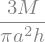

In [7]:
# volume
vol = sy.integrate(sy.integrate(sy.integrate(r, (phi, 0, 2*pi)), (r, 0, a*z/h)), (z,0,h))
rho = M/vol
rho

In [8]:
# fonction intégrale triple:
def integral(f):
    return sy.integrate(sy.integrate(sy.integrate(r * f, (phi, 0, 2*pi)), (r, 0, a*z/h)), (z,0,h))

In [9]:
# centre de masse
R = (rho/M)*integral(z)
R

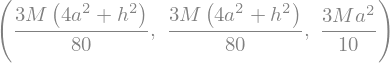

In [10]:
# moments d'inertie (notez que I_x = I_y)
# dans le repère du centre de masse
I_1 = rho * integral(r**2*sy.cos(phi)**2 + z**2)
I_2 = rho * integral(r**2*sy.cos(phi)**2 + z**2)
I_3 = rho * integral(r**2)

I_x = sy.simplify(I_1 - M*R**2)
I_y = sy.simplify(I_2 - M*R**2)
I_z = I_3
(I_x, I_y, I_z)

# Roulement

On considère un cône d'angle $2\alpha$; le centre d'inertie se trouve à une distance $R$ du sommet $O$, origine de coordonnées des repères fixe et mobile.

On appelle $(X,Y,Z)$ le repère fixe et $(x,y,z)$ le repère attaché au cône, avec $z$ son axe de symétrie, $y$ tel qu'il est perpendiculaire à $z$ et à l'axe de rotation $OA$ ($OA$ c'est le segment d'appui du cône sur le plan $XY$); l'axe $x$ se trouve donc dans le plan $OAz$, et il est perpendiculaire à $z$.

On note $\psi$ l'angle entre l'axe $X$ et le segment $OA$.

Vitesse du centre de masse:
$$ V = \dot\psi R \cos \alpha $$

Vitesse angulaire autour de l'axe instantané $OA$:
$$ R \omega \sin \alpha = V, \quad \omega = \dot\psi \cot \alpha$$

Vitesse angulaire $\bm \Omega = \omega \bm n$, avec $\bm n$ la direction de l'axe $OA$:
$$\bm \Omega = (\omega \sin \alpha, 0, \omega \cos \alpha)$$
ou,
$$\bm \Omega = \bigg(\dot\psi \cos \alpha, 0, \dot\psi \frac{\cos^2 \alpha}{\sin \alpha}\bigg)$$

## Moment cinétique

On utilise la formule $\bm L = (I_x \Omega_x, I_y \Omega_y, I_z \Omega_z)$:
$$\bm L = \begin{pmatrix} \dot\psi\frac{3M}{20} \bigg(R^2 + \frac{h^2}{4} \bigg) \cos \alpha \\ 0 \\ \dot \psi \frac{3M}{10} R^2 \cot \alpha \cos \alpha \end{pmatrix}$$

# Rotation (avec $\dot{\theta} = 0$)

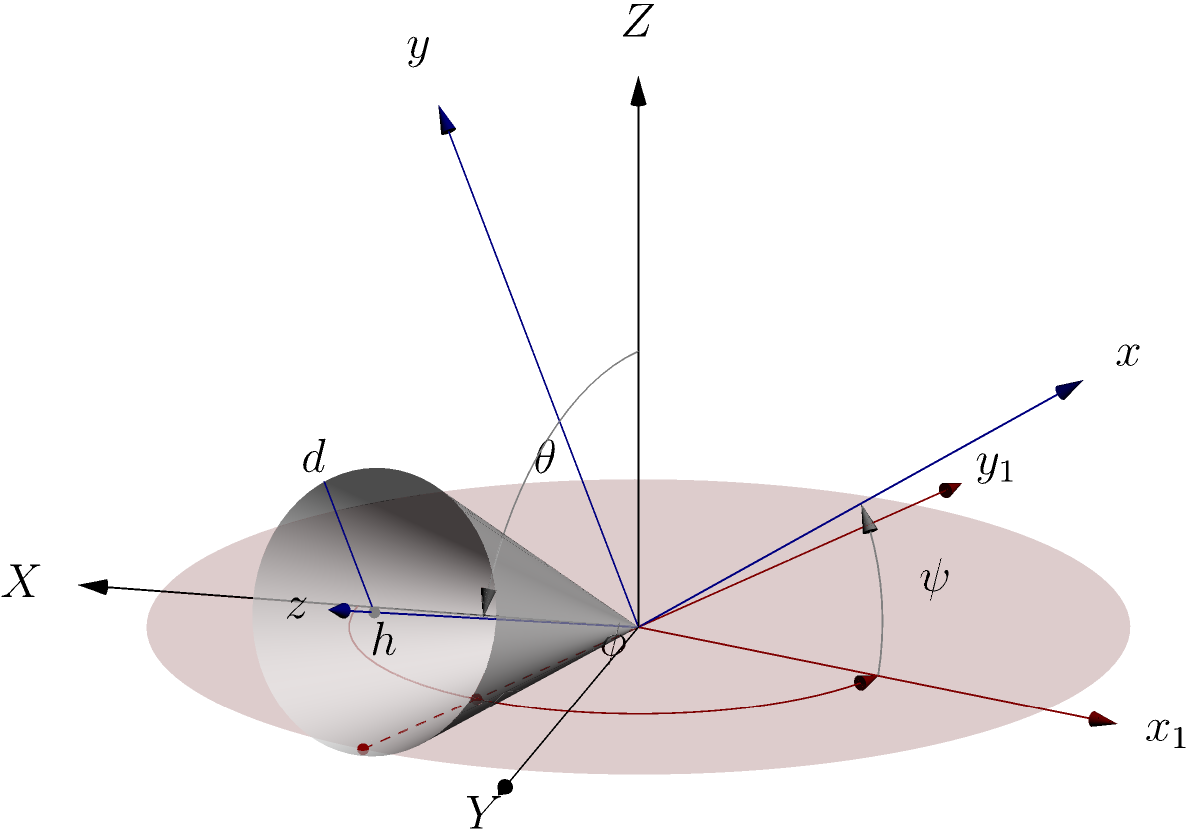

In [14]:
Image(filename='cone.png', width=600)

La position d'un point du cône $(x,y,z)$ dans le repère mobile s'obtient par une rotation de $(X,Y,Z)$ (le repère fixe) autour de $Z$ et d'angle $\phi$, suivie d'un rotation autour de $x$ d'angle $\theta$. Le cône peut tourner d'un angle $\psi$ autour de son axe de symétrie $z$. Le première repère intermédiaire est noté $(x_1,y_1,z_1)$, où $\hat{\bm x}_1$ est le vecteur unitaire:
$$
\hat{\bm x}_1 = R_Z(\phi) \hat{\bm X}, \quad
\hat{\bm y}_1 = R_Z(\phi) \hat{\bm Y}
$$
et le deuxième $(x_2,y_2,z_2)$, résulte de la rotation $R_{x_1}(\theta)$:
$$
\hat{\bm y}_2 = R_{x_1}(\theta) \hat{\bm y}_1, \quad
\hat{\bm z}_2 = R_{x_1}(\theta) \hat{\bm z}_1,
$$
enfin on a la rotation du cône sur lui même:
$$
\hat{\bm x} = R_z(\psi) \hat{\bm x}_2, \quad
\hat{\bm y} = R_z(\psi) \hat{\bm y}_2.
$$
C'est la construction des angles d'Euler, avec $\theta = \pi/2 - \alpha$ ($\alpha$ est le demi-angle du cône).

## Cinématique

La description du mouvement se fait dans le repère $(x_2,y_2,z_2)$, puisque par symétrie (le cône est une figure de révolution) le moment d'inertie est aussi diagonal dans cette base. Une façon de voir que $(x_2,y_2,z_2)$ est convenable vient du fait que (par symétrie) les grandeurs cinématiques ne dépende pas de $\psi$, on peut donc le choisir (par exemple $\psi=0$, voir le cahier sur la toupie).

Dans la base intermédiaire $(x_2,y_2,z_2)$ on obtient:
$$
\bm \Omega = \dot\phi \sin \theta \hat{\bm y}_2 + (\dot\psi + \dot\phi \cos \theta) \hat{\bm z}_2
$$
la vitesse angulaire
$$
\bm L = I\dot\phi \sin \theta \hat{\bm y}_2 + (I\dot\psi + I_z\dot\phi \cos \theta) \hat{\bm z}_2
$$
le moment cinétique ($I=I_x=I_y$), et la formule de Varignon:
$$
\frac{\D \bm L}{\D t} = (I_z - I) \dot{\phi}\sin\theta  (\dot{\psi} + \dot{\phi}\cos\theta) \hat{\bm x}_2 + I \ddot{\psi} \sin\theta \hat{\bm y}_2 + I_z (\ddot{\psi} + \ddot{\phi}\cos\theta)\hat{\bm z}_2 
$$


In [27]:
phi, theta, psi = sy.symbols("phi, theta, psi", real=True)
phi_t, theta_t, psi_t = sy.symbols("phi_t, theta_t, psi_t", real=True)
phi_tt, theta_tt, psi_tt = sy.symbols("phi_tt, theta_tt, psi_tt", real=True)
I_1, I_2, I_3 = sy.symbols("I_1, I_2, I_3", real=True)


In [19]:
# Matrices de passage (rotation)
def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [ -s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

def R_euler(phi, theta, psi):
    return R_z(phi)*R_x(theta)*R_z(psi)

In [7]:
# base canonique
e_x = sy.Matrix([1, 0, 0])
e_y = sy.Matrix([0, 1, 0])
e_z = sy.Matrix([0, 0, 1])

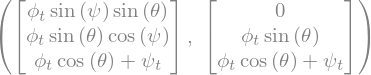

In [16]:
# Omega dans la base (x2,y2,z2)
Omega = phi_t*R_z(-psi)*R_x(-theta)*e_z + psi_t*e_z # repère mobile
o2 = phi_t*R_x(-theta)*e_z + psi_t*e_z
Omega, o2

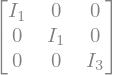

In [42]:
# Moment d'inertie dans la base (x2,y2,z2)
I0 = sy.Matrix([[I_1, 0, 0],[0, I_1, 0],[0, 0, I_3]])
I2 = sy.simplify(R_z(psi)*I0*R_z(-psi))
I2

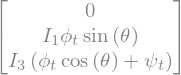

In [44]:
# moment cinétique
L2 = sy.simplify(I2*o2)
L2

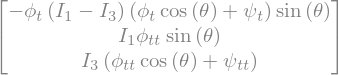

In [47]:
# Varignon
L2_t = sy.simplify(sy.diff(L2, phi_t)*phi_tt + sy.diff(L2, psi_t)*psi_tt)
oxL = sy.simplify(o2.cross(L2))
sy.simplify(L2_t + oxL)

# Brouillon

In [5]:
phi = sy.symbols("phi", real=True)

In [11]:
sy.integrate(sy.sin(phi)**2, (phi, 0, 2*sy.pi))